# ValueInvestor



---




**Goal(s):**


Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.


**Data Description:**


A set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. 



**Success Metrics:**

Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

# I start to explore the data and datasets.

In [ ]:
#!pip install pmdarima
#!pip install git+https://github.com/hyperopt/hyperopt-sklearn
#!pip install tpot
#!pip install scikit-optimize

In [6]:
#importing libraries
import os
import math
import imblearn
import numpy as np
import pandas as pd
import warnings
from hyperopt import tpe
import seaborn as sns
from tpot import TPOTClassifier
warnings.filterwarnings('ignore')
from datetime import date
from skopt import BayesSearchCV
from fbprophet import Prophet
from tensorflow import keras
import matplotlib.pyplot as plt
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from numpy import unique
from numpy import argmax
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  GRU
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.optimizers import SGD
from keras.layers.recurrent_v2 import GRU
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

Excel file contains several sheets so I open my interested sheets.

In [7]:
dfTurkey = pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name = 'Turkey - Koc Holding AS (KCHOL)') 
dfTurkey

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,19.41,19.42,19.63,19.27,13.14M,-0.0046
1,2021-03-30 00:00:00,19.5,19.12,19.81,19.03,21.05M,0.0209
2,2021-03-29 00:00:00,19.1,19.24,19.67,19.1,16.56M,-0.0078
3,2021-03-26 00:00:00,19.25,20.28,20.36,19.1,21.35M,-0.0385
4,2021-03-25 00:00:00,20.02,20.5,20.86,20.02,15.93M,-0.0148
...,...,...,...,...,...,...,...
311,2020-01-07 00:00:00,19.93,20.22,20.28,19.92,2.89M,-0.0075
312,2020-01-06 00:00:00,20.08,20.34,20.34,19.97,1.94M,-0.0108
313,2020-01-03 00:00:00,20.3,20.3,20.44,19.97,3.31M,-0.0039
314,2020-01-02 00:00:00,20.38,20.42,20.44,20.24,2.53M,0.0030


In [8]:
dfColombia = pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name = 'Colombia - Cementos Argos SA (C') 
dfColombia

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,5150.0,5100.0,5170.0,5100.0,212.44K,0.0098
1,2021-03-30 00:00:00,5100.0,5010.0,5100.0,5010.0,583.70K,0.0109
2,2021-03-29 00:00:00,5045.0,5020.0,5045.0,5015.0,117.54K,0.0050
3,2021-03-26 00:00:00,5020.0,5085.0,5085.0,4980.0,203.46K,-0.0020
4,2021-03-25 00:00:00,5030.0,5035.0,5045.0,4950.0,317.06K,0.0010
...,...,...,...,...,...,...,...
299,2020-01-08 00:00:00,6880.0,6940.0,6950.0,6880.0,84.93K,-0.0101
300,2020-01-07 00:00:00,6950.0,6950.0,6950.0,6850.0,168.71K,-0.0071
301,2020-01-03 00:00:00,7000.0,7040.0,7100.0,6960.0,470.77K,-0.0169
302,2020-01-02 00:00:00,7120.0,7300.0,7300.0,7120.0,138.96K,-0.0247


In [9]:
dfRussia = pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name = 'Russia - Sberbank Rossii PAO (S') 
dfRussia 

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,291.02,294.0,294.42,290.26,47.00M,-0.0076
1,2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
2,2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
3,2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
4,2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030
...,...,...,...,...,...,...,...
307,2020-01-09 00:00:00,257.99,259.4,261.76,257.01,38.33M,-0.0045
308,2020-01-08 00:00:00,259.15,253.57,259.15,253.03,40.82M,0.0207
309,2020-01-06 00:00:00,253.9,254.75,254.84,251.4,22.35M,-0.0043
310,2020-01-03 00:00:00,255.0,255.99,258.19,253.7,35.85M,0.0010


The dataset contains the last row of totals so I will remove it from analysis.

In [10]:
# splitting dataframe by row
df_1 = dfColombia.iloc[:303,:]
df_2 = dfColombia.iloc[303:,:]

Next, I will convert all the data types into compatible data.

In [11]:
df_1  = df_1.convert_dtypes()


In [12]:
#replace - characters
df_1['Change %'] = df_1['Change %'].astype('string')
df_1['Vol.'] = df_1['Vol.'].astype('string')

In [13]:
df_1['Change %'] = df_1['Change %'].str.replace("%", " ")
#replace - characters
df_1['Vol.'] = df_1['Vol.'].str.replace("M", " ")
#replace - characters
df_1['Vol.'] = df_1['Vol.'].str.replace("K", " ")
df_1['Vol.'] = df_1['Vol.'].astype(float)
df_1['Price'] = df_1['Price'].astype(float)
df_1['Open'] = df_1['Open'].astype(float)
df_1['High'] = df_1['High'].astype(float)
df_1['Low'] = df_1['Low'].astype(float)
df_1['Change %'] = df_1['Change %'].astype(float)
df_1['Date'] = pd.to_datetime(df_1['Date'])

Exploring data.

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      303 non-null    datetime64[ns]
 1   Price     303 non-null    float64       
 2   Open      303 non-null    float64       
 3   High      303 non-null    float64       
 4   Low       303 non-null    float64       
 5   Vol.      303 non-null    float64       
 6   Change %  303 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.7 KB


No missing values.

In [ ]:
df_1.describe()

,Price,Open,High,Low,Vol.,Change %
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,4836.544554,4849.643564,4917.339934,4770.336634,293.577096,-0.000450
std,1025.407096,1026.688545,1014.299439,1029.420562,244.111733,0.037062
min,2420.000000,2500.000000,2600.000000,2415.000000,1.000000,-0.240000
25%,3900.000000,3895.000000,3970.000000,3797.500000,101.805000,-0.011950
50%,4801.000000,4800.000000,4870.000000,4774.000000,248.750000,0.000000
75%,5770.000000,5760.000000,5845.000000,5700.000000,443.345000,0.012200
max,7120.000000,7300.000000,7300.000000,7120.000000,984.060000,0.222200


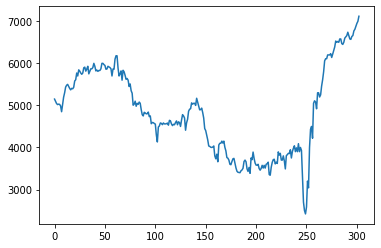

In [ ]:
y = df_1['Price']
y.plot()

Splitting data into train and test set.

In [14]:
filtered_df = df_1[df_1["Date"].isin(pd.date_range('2020-2-1', '2020-12-31'))]
filtered_df

,Date,Price,Open,High,Low,Vol.,Change %
61,2020-12-30,6180.0,6180.0,6275.0,6020.0,651.79,0.0000
62,2020-12-29,6180.0,5900.0,6180.0,5900.0,876.72,0.0492
63,2020-12-28,5890.0,5705.0,5890.0,5705.0,339.87,0.0333
64,2020-12-24,5700.0,5780.0,5780.0,5700.0,10.42,-0.0087
65,2020-12-23,5750.0,5870.0,5890.0,5720.0,527.28,-0.0120
...,...,...,...,...,...,...,...
277,2020-02-07,6310.0,6360.0,6360.0,6280.0,400.12,-0.0125
278,2020-02-06,6390.0,6530.0,6540.0,6360.0,622.79,-0.0214
279,2020-02-05,6530.0,6590.0,6590.0,6510.0,584.24,0.0046
280,2020-02-04,6500.0,6530.0,6570.0,6500.0,469.99,-0.0031


# Exposing different models to data.

Facebook Prophet

In [15]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':filtered_df.Date,'y':filtered_df.Price})
ts.head()

,ds,y
61,2020-12-30,6180.0
62,2020-12-29,6180.0
63,2020-12-28,5890.0
64,2020-12-24,5700.0
65,2020-12-23,5750.0


In [45]:
# create timeseries readable by fbprophet
tsval = pd.DataFrame({'ds':validationdf.Date,'y':validationdf.Price})
tsval.head()

,ds,y
0,2021-03-31,5150.0
1,2021-03-30,5100.0
2,2021-03-29,5045.0
3,2021-03-26,5020.0
4,2021-03-25,5030.0


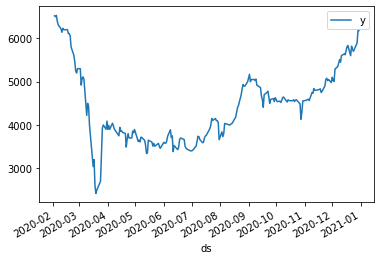

In [ ]:
ts.plot(x='ds',y='y')

In [42]:
#splitting into train and test
train=ts[:61]
test = ts[61:]

In [43]:
#validations set
validationdf = df_1[:61]

In [17]:
#make a model and fit   
train_model = Prophet(changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.1,
                      n_changepoints = 127,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,                     
                      interval_width=0.95)
    
train_model.fit(train)
    
    
    

In [46]:
test_model =  Prophet(changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.1,
                      n_changepoints = 127,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,                     
                      interval_width=0.95)
test_model.fit(tsval)   

INFO:fbprophet:n_changepoints greater than number of observations. Using 47.


In [34]:
#predict daily
futureD = train_model.make_future_dataframe(periods=31,freq='D') # Make future date data frame
forecastD = train_model.predict(futureD) # Predict future value.
forecastD.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-02-03,682.399153,6412.415258,6709.789840,682.399153,682.399153,8.351816,8.351816,8.351816,8.618294,...,0.398310,0.398310,0.398310,-0.131833,-0.131833,-0.131833,0.0,0.0,0.0,6563.515420
1,2020-02-04,673.866451,6359.470691,6652.847718,673.866451,673.866451,8.351816,8.351816,8.351816,8.655948,...,0.407565,0.407565,0.407565,-0.103433,-0.103433,-0.103433,0.0,0.0,0.0,6506.819328
2,2020-02-05,665.311664,6315.193798,6603.229432,665.311664,665.311664,8.351816,8.351816,8.351816,8.714917,...,0.425592,0.425592,0.425592,-0.062491,-0.062491,-0.062491,0.0,0.0,0.0,6463.447645
3,2020-02-06,654.377563,6242.721390,6548.742209,654.377563,654.377563,8.351816,8.351816,8.351816,8.775764,...,0.429456,0.429456,0.429456,-0.005509,-0.005509,-0.005509,0.0,0.0,0.0,6397.040409
4,2020-02-07,643.187858,6187.200909,6487.116980,643.187858,643.187858,8.351816,8.351816,8.351816,8.849104,...,0.427031,0.427031,0.427031,0.070257,0.070257,0.070257,0.0,0.0,0.0,6334.824217


In [18]:
#predict weekly
futureW = train_model.make_future_dataframe(periods=2,freq='W') # Make future date data frame 
forecastW = train_model.predict(futureW) # Predict future value.
forecastW.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-02-03,682.399153,6410.767459,6720.544382,682.399153,682.399153,8.351816,8.351816,8.351816,8.618294,...,0.398310,0.398310,0.398310,-0.131833,-0.131833,-0.131833,0.0,0.0,0.0,6563.515420
1,2020-02-04,673.866451,6360.608517,6647.712713,673.866451,673.866451,8.351816,8.351816,8.351816,8.655948,...,0.407565,0.407565,0.407565,-0.103433,-0.103433,-0.103433,0.0,0.0,0.0,6506.819328
2,2020-02-05,665.311664,6319.001804,6623.144246,665.311664,665.311664,8.351816,8.351816,8.351816,8.714917,...,0.425592,0.425592,0.425592,-0.062491,-0.062491,-0.062491,0.0,0.0,0.0,6463.447645
3,2020-02-06,654.377563,6249.970248,6549.926949,654.377563,654.377563,8.351816,8.351816,8.351816,8.775764,...,0.429456,0.429456,0.429456,-0.005509,-0.005509,-0.005509,0.0,0.0,0.0,6397.040409
4,2020-02-07,643.187858,6185.315196,6486.462102,643.187858,643.187858,8.351816,8.351816,8.351816,8.849104,...,0.427031,0.427031,0.427031,0.070257,0.070257,0.070257,0.0,0.0,0.0,6334.824217


In [19]:
# Predict monthly
futureM = train_model.make_future_dataframe(periods=12,freq='MS') # Make future date data frame 
forecastM = train_model.predict(futureM) # Predict future value.
forecastM.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-02-03,682.399153,6412.330012,6710.403596,682.399153,682.399153,8.351816,8.351816,8.351816,8.618294,...,0.398310,0.398310,0.398310,-0.131833,-0.131833,-0.131833,0.0,0.0,0.0,6563.515420
1,2020-02-04,673.866451,6354.001064,6649.423950,673.866451,673.866451,8.351816,8.351816,8.351816,8.655948,...,0.407565,0.407565,0.407565,-0.103433,-0.103433,-0.103433,0.0,0.0,0.0,6506.819328
2,2020-02-05,665.311664,6320.450295,6607.647706,665.311664,665.311664,8.351816,8.351816,8.351816,8.714917,...,0.425592,0.425592,0.425592,-0.062491,-0.062491,-0.062491,0.0,0.0,0.0,6463.447645
3,2020-02-06,654.377563,6257.503672,6538.912577,654.377563,654.377563,8.351816,8.351816,8.351816,8.775764,...,0.429456,0.429456,0.429456,-0.005509,-0.005509,-0.005509,0.0,0.0,0.0,6397.040409
4,2020-02-07,643.187858,6183.922316,6485.050066,643.187858,643.187858,8.351816,8.351816,8.351816,8.849104,...,0.427031,0.427031,0.427031,0.070257,0.070257,0.070257,0.0,0.0,0.0,6334.824217


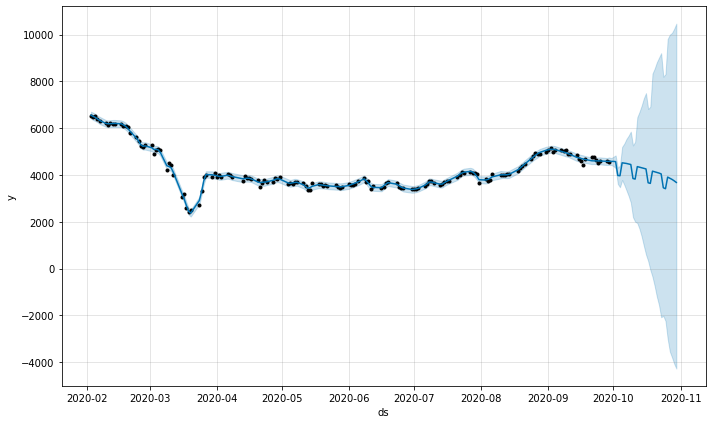

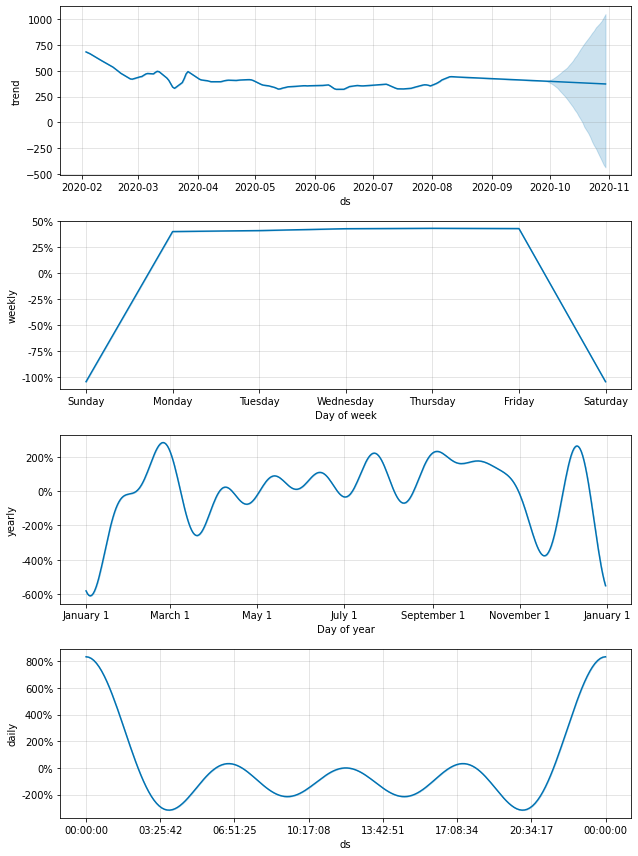

In [22]:
# Plot results
fig1 = train_model.plot(forecastD) # Plot the fit to past data and future forcast.
fig2 = train_model.plot_components(forecastD) # Plot breakdown of components.
plt.show()
 # Displaying various results.

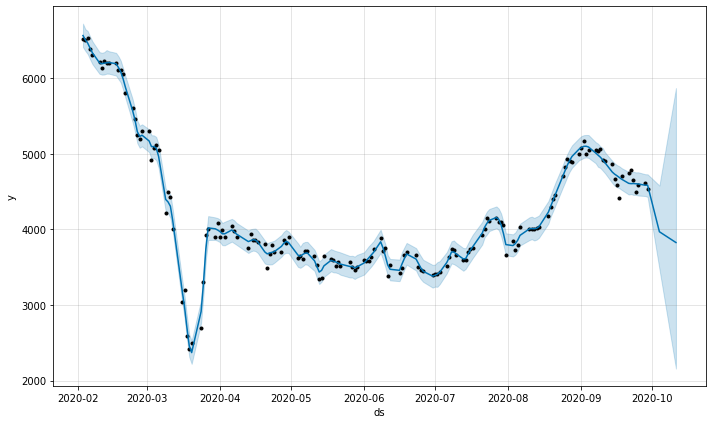

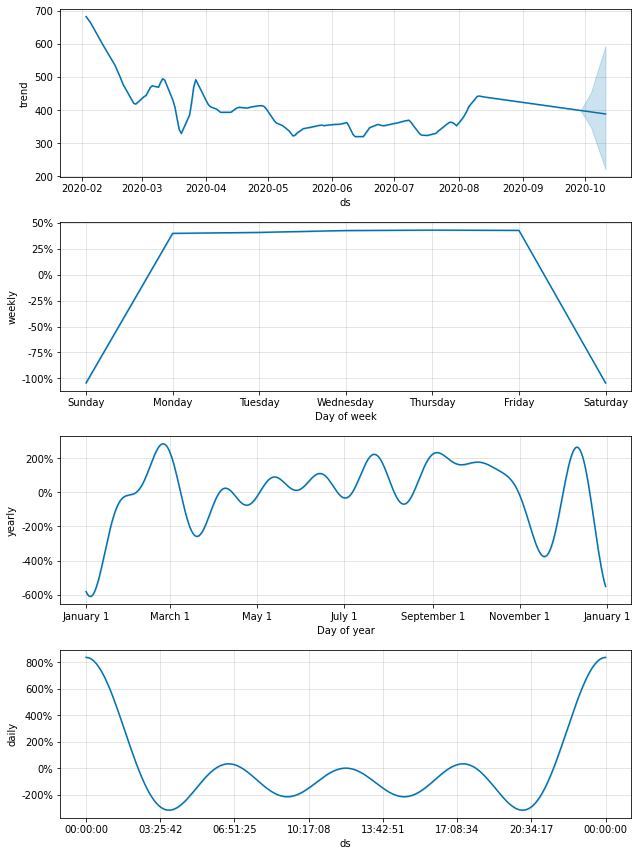

In [23]:
# Plot results
fig1 = train_model.plot(forecastW) # Plot the fit to past data and future forcast.
fig2 = train_model.plot_components(forecastW) # Plot breakdown of components.
plt.show()
 # Displaying various results.

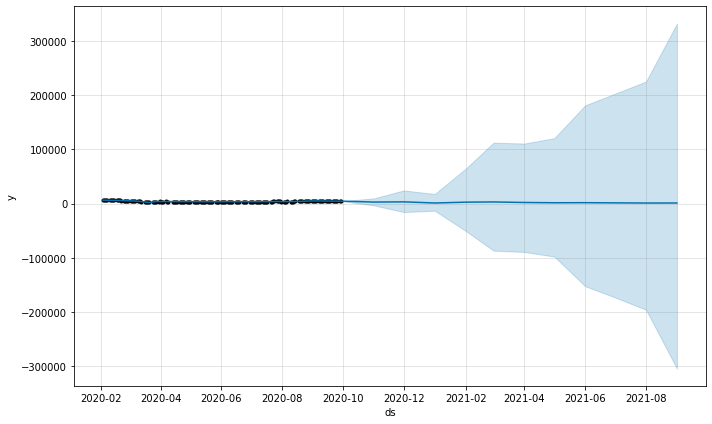

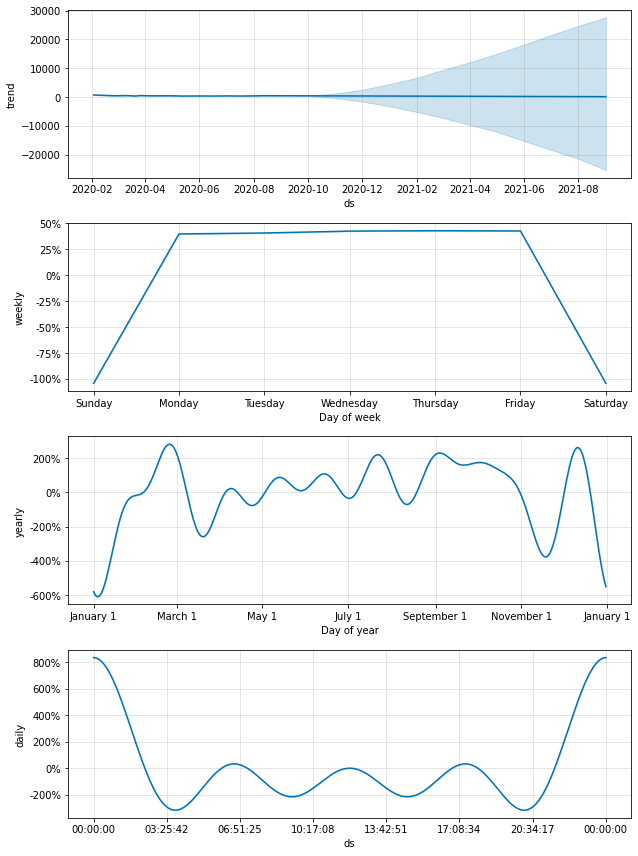

In [24]:
# Plot results
fig1 = train_model.plot(forecastM) # Plot the fit to past data and future forcast.
fig2 = train_model.plot_components(forecastM) # Plot breakdown of components.
plt.show()
 # Displaying

In [25]:
# display the most critical output columns from the forecast
forecastD[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-03,6563.515420,6415.173740,6705.546124
1,2020-02-04,6506.819328,6351.524484,6664.004035
2,2020-02-05,6463.447645,6308.891975,6612.071686
3,2020-02-06,6397.040409,6256.903687,6531.045629
4,2020-02-07,6334.824217,6182.467307,6489.580712
...,...,...,...,...
186,2020-10-26,3910.998806,-2999.660664,9814.245553
187,2020-10-27,3863.261655,-3547.747193,10000.420196
188,2020-10-28,3813.278756,-3793.431937,10074.526078
189,2020-10-29,3752.052954,-4065.322360,10250.169519


In [51]:
#predicted values
X_tst_final= test_model.predict(tsval)

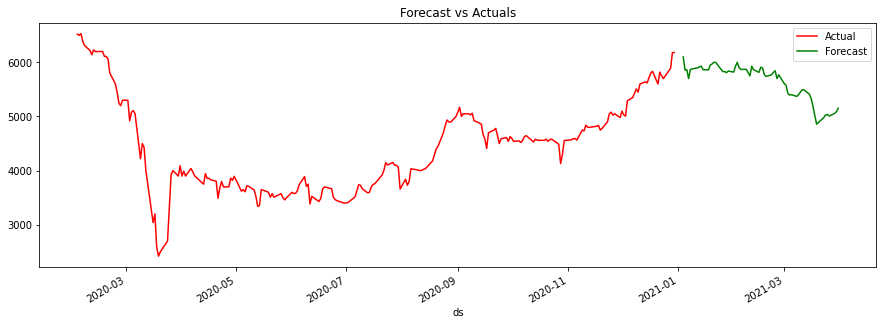

In [52]:
#plot results
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
ts.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_final.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-03-01 00:00:00 and 2021-03-21 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 31.
INFO:fbprophet:n_changepoints greater than number of observations. Using 37.
INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,2.646322e+05,514.424155,440.164651,0.079167,0.079167,0.000000
1,2 days,4.347373e+06,2085.035536,2084.976515,0.401156,0.401156,0.000000
2,3 days,1.931261e+07,4394.611690,4370.003644,0.836662,0.836662,0.000000
3,4 days,3.961011e+07,6293.656724,5140.139199,0.980608,1.283087,0.333333
4,5 days,4.874914e+07,6982.058645,5047.964558,1.004390,1.004390,0.500000


,horizon,mse,rmse,mae,mape,mdape,coverage
5,6 days,2.437699e+07,4937.305678,2558.737825,0.508885,0.027856,0.750000
6,7 days,5.635280e+08,23738.744468,16815.911375,3.131846,3.131846,0.500000
7,8 days,1.034017e+09,32156.134171,25400.125591,4.822451,5.475421,0.333333
8,9 days,2.945494e+09,54272.405040,51946.932775,9.759657,9.759657,0.000000
9,10 days,5.354282e+09,73172.962165,69451.827645,12.914366,12.914366,0.000000


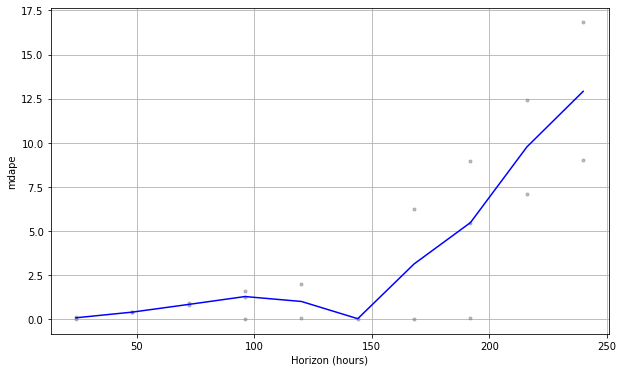

In [56]:
#check accuracy
df_cv = cross_validation(test_model, initial='50 days', period='10 days', horizon = '10 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mdape', rolling_window=0.1)
plt.show()

By default the following metrics are included: 'mse': mean squared error, 'rmse': root mean squared error, 'mae': mean absolute error, 'mape': mean percent error, 'mdape': median percent error, 'smape': symmetric mean absolute percentage error, 'coverage': coverage of the upper and lower intervals.

Coverage is the percent of items in the training data the model is able to recommend on a test set.  The random recommender has nearly 100% coverage as expected. 



# Getting Bollinger Bands in action.

In [ ]:
current_df = filtered_df.set_index('Date')

In [ ]:
#validations set
validationdf = df_1[:61]


In [ ]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

In [ ]:

closing_prices = current_df['Price'] # Use only closing prices

In [ ]:
#validations set
closingpricesval =  validationdf['Price'] # Use only closing prices

In [ ]:
sma = get_sma(closing_prices, 20) # Get 20 day SMA

In [ ]:
#validations set
smaval = get_sma(closingpricesval, 20) # Get 20 day SMA

In [ ]:
symbol = ' SA'

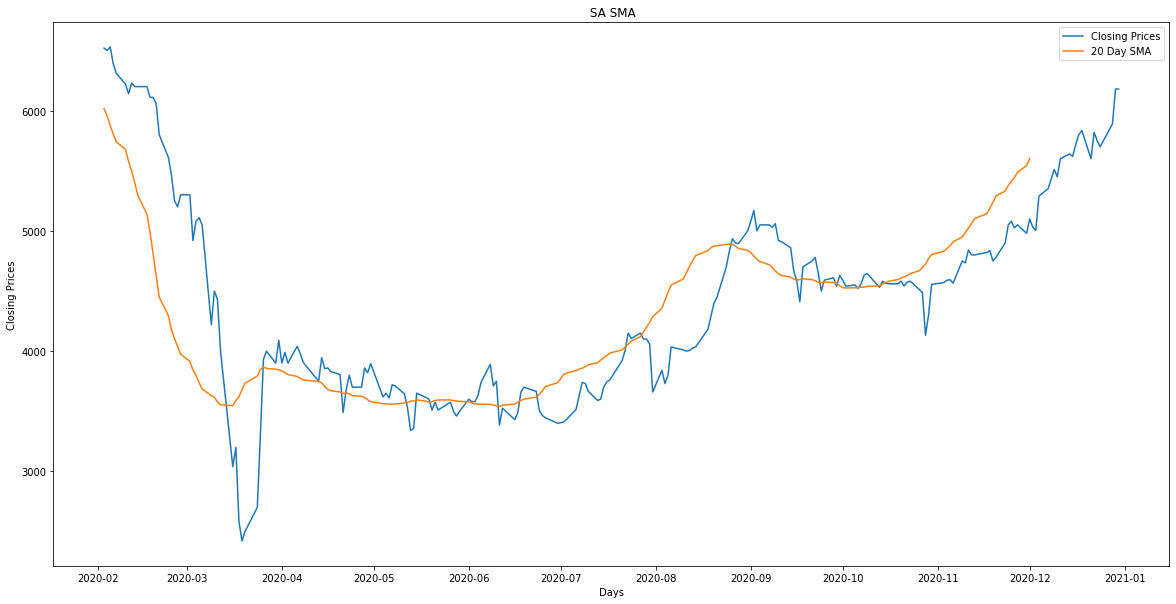

In [ ]:
# Plot the data
plt.rcParams["figure.figsize"] = (20,10)
plt.title(symbol + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(sma, label='20 Day SMA')
plt.legend()
plt.show()

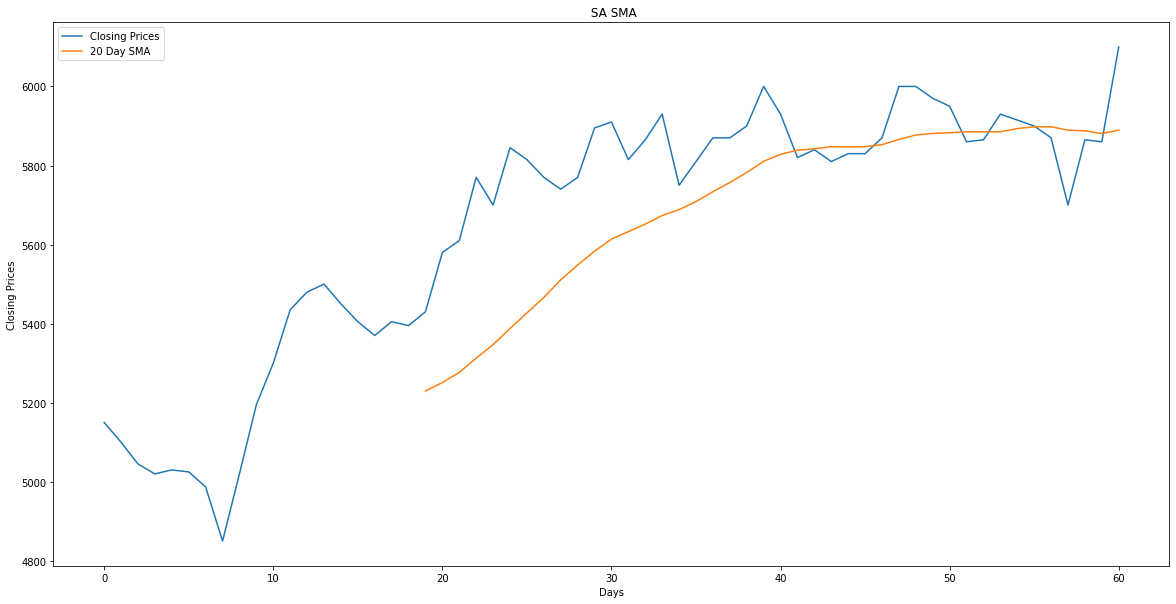

In [ ]:
# Plot the data
plt.rcParams["figure.figsize"] = (20,10)
plt.title(symbol + ' SMA')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closingpricesval, label='Closing Prices')
plt.plot(smaval, label='20 Day SMA')
plt.legend()
plt.show()

In [ ]:
def get_bollinger_bands(prices, sma, rate=20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

In [ ]:
bollinger_up, bollinger_down = get_bollinger_bands(closing_prices, sma)

In [ ]:
#validations set
bollinger_upval, bollinger_downval = get_bollinger_bands(closingpricesval, smaval)

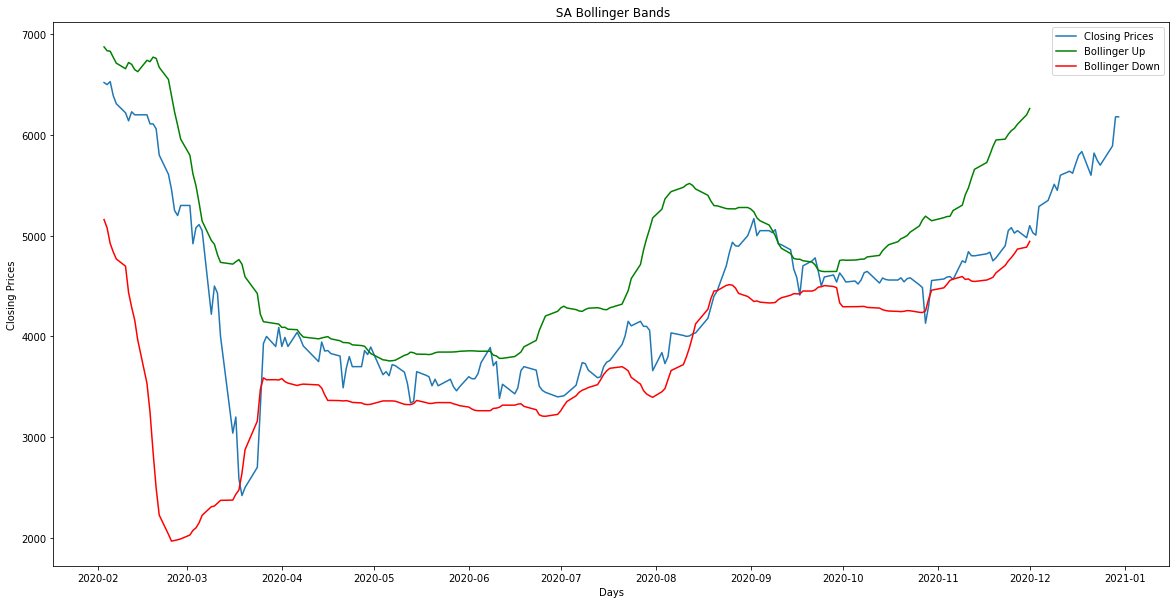

In [ ]:
#plot results
plt.rcParams["figure.figsize"] = (20,10)
plt.title(symbol + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

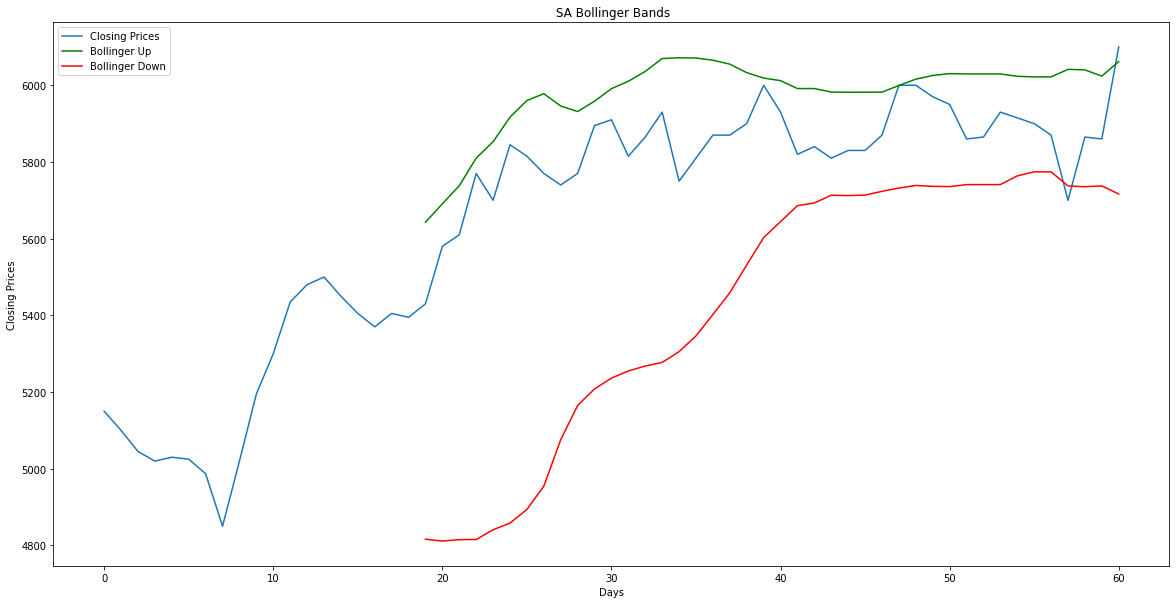

In [ ]:
#plot results
plt.rcParams["figure.figsize"] = (20,10)
plt.title(symbol + ' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closingpricesval, label='Closing Prices')
plt.plot(bollinger_upval, label='Bollinger Up', c='g')
plt.plot(bollinger_downval, label='Bollinger Down', c='r')
plt.legend()
plt.show()

In [ ]:
current_df['sma_20'] = get_sma(current_df['Price'], 20)
current_df.tail()

,Price,Open,High,Low,Vol.,Change %,sma_20
Date,,,,,,,
2020-02-07,6310.0,6360.0,6360.0,6280.0,400.12,-0.0125,5740.5
2020-02-06,6390.0,6530.0,6540.0,6360.0,622.79,-0.0214,5804.5
2020-02-05,6530.0,6590.0,6590.0,6510.0,584.24,0.0046,5877.0
2020-02-04,6500.0,6530.0,6570.0,6500.0,469.99,-0.0031,5956.0
2020-02-03,6520.0,6630.0,6630.0,6520.0,80.97,0.0031,6017.0


In [ ]:
current_df['upper_bb'], current_df['lower_bb'] = get_bollinger_bands(current_df['Price'], current_df['sma_20'], 20)
current_df.tail()

,Price,Open,High,Low,Vol.,Change %,sma_20,upper_bb,lower_bb
Date,,,,,,,,,
2020-02-07,6310.0,6360.0,6360.0,6280.0,400.12,-0.0125,5740.5,6712.648462,4768.351538
2020-02-06,6390.0,6530.0,6540.0,6360.0,622.79,-0.0214,5804.5,6770.391462,4838.608538
2020-02-05,6530.0,6590.0,6590.0,6510.0,584.24,0.0046,5877.0,6831.526060,4922.473940
2020-02-04,6500.0,6530.0,6570.0,6500.0,469.99,-0.0031,5956.0,6835.626715,5076.373285
2020-02-03,6520.0,6630.0,6630.0,6520.0,80.97,0.0031,6017.0,6873.998434,5160.001566


In [ ]:
#validations set
validationdf['sma_20'] = get_sma(validationdf['Price'], 20)
validationdf.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Price,Open,High,Low,Vol.,Change %,sma_20
56,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80,0.0298,5898.00
57,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18,-0.0281,5889.50
58,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98,0.0009,5887.75
59,2021-01-05,5860.0,6000.0,6000.0,5860.0,457.03,-0.0393,5880.75
60,2021-01-04,6100.0,6110.0,6160.0,5900.0,454.99,-0.0129,5889.25


In [ ]:
#validations set
validationdf['upper_bb'], validationdf['lower_bb'] = get_bollinger_bands(validationdf['Price'], validationdf['sma_20'], 20)
validationdf.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Price,Open,High,Low,Vol.,Change %,sma_20,upper_bb,lower_bb
56,2021-01-08,5870.0,5805.0,5870.0,5790.0,154.80,0.0298,5898.00,6021.773988,5774.226012
57,2021-01-07,5700.0,5860.0,5985.0,5700.0,539.18,-0.0281,5889.50,6041.500693,5737.499307
58,2021-01-06,5865.0,5860.0,5955.0,5860.0,338.98,0.0009,5887.75,6040.047320,5735.452680
59,2021-01-05,5860.0,6000.0,6000.0,5860.0,457.03,-0.0393,5880.75,6023.919940,5737.580060
60,2021-01-04,6100.0,6110.0,6160.0,5900.0,454.99,-0.0129,5889.25,6061.885149,5716.614851


Creating crosspoints of bollinger bands for "buy" and "sell" decisions.

In [ ]:
buyers = current_df[current_df['Price'] <= current_df['lower_bb']]
sellers = current_df[current_df['Price'] >= current_df['upper_bb']]

In [ ]:
#validations set
buyersval = validationdf[validationdf['Price'] <= validationdf['lower_bb']]
sellersval = validationdf[validationdf['Price'] >= validationdf['upper_bb']]

Bollinger Bands of a Validation Set( For Predictions)

In [ ]:
# Plotting

import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = "plotly_dark"

fig = go.Figure()
fig.add_trace(go.Scatter(x=bollinger_downval.index, 
                         y=validationdf['lower_bb'], 
                         name='Lower Band', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=bollinger_upval.index, 
                         y=validationdf['upper_bb'], 
                         name='Upper Band', 
                         fill='tonexty', 
                         fillcolor='rgba(173,204,255,0.2)', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=validationdf.index, 
                         y=validationdf['Price'], 
                         name='Price', 
                         line_color='#636EFA'
                        ))

fig.add_trace(go.Scatter(x=buyersval.index, 
                         y=buyersval['Price'], 
                         name='Buyers', 
                         mode='markers',
                         marker=dict(
                             color='#00CC96',
                             size=10,
                             )
                         ))
fig.add_trace(go.Scatter(x=sellersval.index, 
                         y=sellersval['Price'], 
                         name='Sellers', 
                         mode='markers', 
                         marker=dict(
                             color='#EF553B',
                             size=10,
                             )
                         ))
fig.show()

LSTM

In [ ]:
#input data
x = current_df.Open
y = current_df.Price

In [ ]:
#train and test split data
trainxx, testxx = x[0:int(0.725*(len(x)))], x[int(0.725*(len(x))):]
trainy, testy = y[0:int(0.725*(len(y)))], y[int(0.725*(len(y))):]
trainvalue = np.array(list(zip(trainxx,trainy)))
testvalue = np.array(list(zip(trainxx,trainy)))

In [ ]:
def create_dataset(n_X, look_back):
  dataX, dataY = [], []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainxx, trainy = create_dataset(trainvalue, look_back)
testxx,testy = create_dataset(testvalue, look_back)

trainxx = np.reshape(trainxx, (trainxx.shape[0], 1, 2))
testxx = np.reshape(testxx, (testxx.shape[0], 1, 2))

In [ ]:
#train a model
lstmmodel = Sequential()
lstmmodel.add(LSTM(256, activation = 'relu' ,  input_shape = (trainxx.shape[1], 2)))
lstmmodel.add(Dense(1))
lstmmodel.compile(loss = 'mean_squared_error', optimizer = 'adam')
lstmmodel.fit(trainxx, trainy, epochs = 200, batch_size = 10, verbose = 2, shuffle = False)

Epoch 1/200
16/16 - 1s - loss: 16244351.0000 - 1s/epoch - 82ms/step
Epoch 2/200
16/16 - 0s - loss: 12032227.0000 - 74ms/epoch - 5ms/step
Epoch 3/200
16/16 - 0s - loss: 7748536.5000 - 84ms/epoch - 5ms/step
Epoch 4/200
16/16 - 0s - loss: 3870141.2500 - 66ms/epoch - 4ms/step
Epoch 5/200
16/16 - 0s - loss: 1258323.6250 - 66ms/epoch - 4ms/step
Epoch 6/200
16/16 - 0s - loss: 183955.6562 - 71ms/epoch - 4ms/step
Epoch 7/200
16/16 - 0s - loss: 12666.1416 - 67ms/epoch - 4ms/step
Epoch 8/200
16/16 - 0s - loss: 16404.2891 - 71ms/epoch - 4ms/step
Epoch 9/200
16/16 - 0s - loss: 12545.0693 - 72ms/epoch - 4ms/step
Epoch 10/200
16/16 - 0s - loss: 11067.7490 - 71ms/epoch - 4ms/step
Epoch 11/200
16/16 - 0s - loss: 10960.8262 - 74ms/epoch - 5ms/step
Epoch 12/200
16/16 - 0s - loss: 10910.4785 - 74ms/epoch - 5ms/step
Epoch 13/200
16/16 - 0s - loss: 10929.5791 - 68ms/epoch - 4ms/step
Epoch 14/200
16/16 - 0s - loss: 10939.5996 - 70ms/epoch - 4ms/step
Epoch 15/200
16/16 - 0s - loss: 10937.5820 - 69ms/epoch - 4

In [ ]:
#lstm predict
lstmpredict = lstmmodel.predict(testxx)

In [ ]:
#real price
real_stock_price = current_df.Price[:159].values

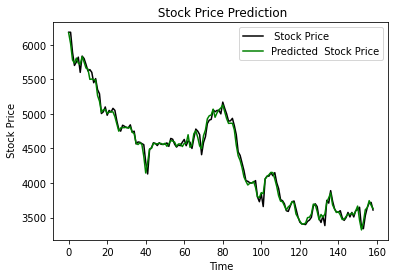

In [ ]:
#plot results
plt.plot(real_stock_price, color = 'black', label = ' Stock Price')
plt.plot(lstmpredict, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

Sliceddf for converging current df and predictions.

In [ ]:
sliceddf = current_df[:159]

In [ ]:
sliceddf['PredictedLSTM'] = lstmpredict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sliceddf.head()

,Price,Open,High,Low,Vol.,Change %,sma_20,upper_bb,lower_bb,PredictedLSTM
Date,,,,,,,,,,
2020-12-30,6180.0,6180.0,6275.0,6020.0,651.79,0.0000,NaN,NaN,NaN,6171.025391
2020-12-29,6180.0,5900.0,6180.0,5900.0,876.72,0.0492,NaN,NaN,NaN,6018.940430
2020-12-28,5890.0,5705.0,5890.0,5705.0,339.87,0.0333,NaN,NaN,NaN,5780.993652
2020-12-24,5700.0,5780.0,5780.0,5700.0,10.42,-0.0087,NaN,NaN,NaN,5735.228027
2020-12-23,5750.0,5870.0,5890.0,5720.0,527.28,-0.0120,NaN,NaN,NaN,5806.876465



Creating crosspoints of bollinger bands for "buy" and "sell" decisions.


In [ ]:
buys = sliceddf[sliceddf['PredictedLSTM'] <= sliceddf['lower_bb']]
sells =  sliceddf[sliceddf['PredictedLSTM'] >= sliceddf['lower_bb']]


Calculating Capital returns based on "buy" and "sell" decisions.

In [ ]:
difference = sells.PredictedLSTM.values[:13] - buyers.Price.values

In [ ]:
difference

array([ 500.55371094,  708.20458984,  892.77880859,  624.12402344,
        579.29003906,  561.31591797,  565.00244141,  571.48486328,
        762.57470703, 1502.50927734, 2102.28564453, 2309.47509766,
       2373.63574219])

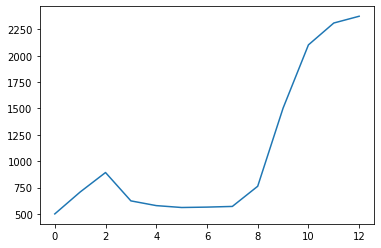

In [ ]:
plt.plot(difference)

To Maximize Capital Returns, I would look at predictions and buy and sell points. It is possible to forecast more returns if to follow the strategy of bollinger bands in the future where the deal would be the maximum. This would be the calculated difference and choosing the best time to buy and sell. If you look at the plot, you can see that I have 13 buy and sell points and the data point number 8,9,10,12,13 would give the best returns from a deal. The more accurate machine learning model for predictions the less loss will happen.Loss will never happen if to follow the predictions because it can show negative numbers so the predictions will warn and thus the loss will never happen. Hold period will be minimized if to make each deal with the positive returns.

GRU

In [ ]:
#make a model

#optimizerGRU =  SGD(lr=learning_rate,momentum=momentum, decay=decay_rate, nesterov=False)
modelGRU = Sequential()
modelGRU.add(GRU(units=256,activation = 'relu' , input_shape = (trainxx.shape[1], 2)))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.compile(optimizer="adam",loss='mean_absolute_error')#check learning rate and SGD and MAE

modelGRU.fit(trainxx,trainy,epochs=100,batch_size=4,verbose=2)

Epoch 1/100
40/40 - 1s - loss: 3154.8123 - 1s/epoch - 36ms/step
Epoch 2/100
40/40 - 0s - loss: 841.8102 - 206ms/epoch - 5ms/step
Epoch 3/100
40/40 - 0s - loss: 344.3728 - 192ms/epoch - 5ms/step
Epoch 4/100
40/40 - 0s - loss: 375.9472 - 204ms/epoch - 5ms/step
Epoch 5/100
40/40 - 0s - loss: 304.0898 - 212ms/epoch - 5ms/step
Epoch 6/100
40/40 - 0s - loss: 313.8131 - 206ms/epoch - 5ms/step
Epoch 7/100
40/40 - 0s - loss: 340.7547 - 219ms/epoch - 5ms/step
Epoch 8/100
40/40 - 0s - loss: 343.5438 - 204ms/epoch - 5ms/step
Epoch 9/100
40/40 - 0s - loss: 295.4668 - 215ms/epoch - 5ms/step
Epoch 10/100
40/40 - 0s - loss: 319.7234 - 189ms/epoch - 5ms/step
Epoch 11/100
40/40 - 0s - loss: 299.6856 - 196ms/epoch - 5ms/step
Epoch 12/100
40/40 - 0s - loss: 303.2770 - 196ms/epoch - 5ms/step
Epoch 13/100
40/40 - 0s - loss: 273.1488 - 191ms/epoch - 5ms/step
Epoch 14/100
40/40 - 0s - loss: 317.8428 - 217ms/epoch - 5ms/step
Epoch 15/100
40/40 - 0s - loss: 295.4203 - 204ms/epoch - 5ms/step
Epoch 16/100
40/40 -

In [ ]:
#predict values
predicted_stock_priceGRU = modelGRU.predict(testxx)

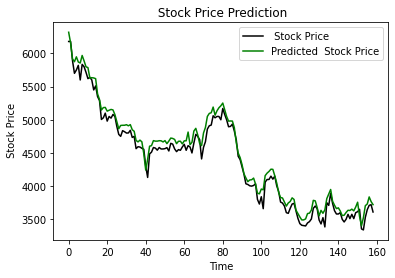

In [ ]:
#plot results
plt.plot(real_stock_price, color = 'black', label = ' Stock Price')
plt.plot(predicted_stock_priceGRU, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

GRU works better with Adam optimizer

ARIMAX

In [ ]:
dfRussia = pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name = 'Russia - Sberbank Rossii PAO (S') 
dfRussia 

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,291.02,294.0,294.42,290.26,47.00M,-0.0076
1,2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
2,2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
3,2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
4,2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030
...,...,...,...,...,...,...,...
307,2020-01-09 00:00:00,257.99,259.4,261.76,257.01,38.33M,-0.0045
308,2020-01-08 00:00:00,259.15,253.57,259.15,253.03,40.82M,0.0207
309,2020-01-06 00:00:00,253.9,254.75,254.84,251.4,22.35M,-0.0043
310,2020-01-03 00:00:00,255.0,255.99,258.19,253.7,35.85M,0.0010


In [ ]:
dfRus =  dfRussia.iloc[:311,:]
# splitting dataframe by row index



In [ ]:
dfRus  = dfRus.convert_dtypes()

In [ ]:
#replace - characters
dfRus['Change %'] = dfRus['Change %'].astype('string')
dfRus['Vol.'] = dfRus['Vol.'].astype('string')

In [ ]:

dfRus['Change %'] = dfRus['Change %'].str.replace("%", " ")
#replace - characters
dfRus['Vol.'] = dfRus['Vol.'].str.replace("M", " ")
#replace - characters
dfRus['Vol.'] = dfRus['Vol.'].str.replace("K", " ")
dfRus['Vol.'] = dfRus['Vol.'].astype(float)
dfRus['Price'] = dfRus['Price'].astype(float)
dfRus['Open'] = dfRus['Open'].astype(float)
dfRus['High'] = dfRus['High'].astype(float)
dfRus['Low'] = dfRus['Low'].astype(float)
dfRus['Change %'] = dfRus['Change %'].astype(float)
#convert to datetime
dfRus['Date'] = pd.to_datetime(dfRus['Date'])

In [ ]:
# add datetime data
dfRus["month"] = dfRus.Date.dt.month
dfRus["week"] = dfRus.Date.dt.week
dfRus["day"] = dfRus.Date.dt.day
dfRus["day_of_week"] = dfRus.Date.dt.dayofweek
dfRus.head()

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,day_of_week
0,2021-03-31,291.02,294.00,294.42,290.26,47.00,-0.0076,3,13,31,2
1,2021-03-30,293.25,294.86,295.72,291.50,38.81,-0.0002,3,13,30,1
2,2021-03-29,293.30,289.72,294.09,289.26,43.68,0.0071,3,13,29,0
3,2021-03-26,291.22,288.63,292.75,288.32,56.07,0.0159,3,12,26,4
4,2021-03-25,286.66,286.50,287.03,283.85,35.22,0.0030,3,12,25,3


In [ ]:
#add lagged and exagenous data to a statistical model
dfRus.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Vol.", "Change %"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = dfRus[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = dfRus[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = dfRus[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(float)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(float)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(float)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(float)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(float)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(float)

for feature in lag_features:
    dfRus[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    dfRus[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    dfRus[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    dfRus[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    dfRus[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    dfRus[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

dfRus.fillna(dfRus.mean(), inplace=True)

dfRus.set_index("Date", drop=False, inplace=True)
dfRus.head(65)

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,...,Vol._mean_lag30,Vol._std_lag3,Vol._std_lag7,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,2021-03-31,291.02,294.00,294.42,290.26,47.00,-0.0076,3,13,31,...,73.889934,17.822796,21.410548,28.940690,0.000634,0.000610,6.889890e-04,0.016982,0.018404,0.019890
2021-03-30,2021-03-30,293.25,294.86,295.72,291.50,38.81,-0.0002,3,13,30,...,47.000000,17.822796,21.410548,28.940690,-0.007600,-0.007600,-7.600000e-03,0.016982,0.018404,0.019890
2021-03-29,2021-03-29,293.30,289.72,294.09,289.26,43.68,0.0071,3,13,29,...,42.905000,5.791205,5.791205,5.791205,-0.003900,-0.003900,-3.900000e-03,0.005233,0.005233,0.005233
2021-03-26,2021-03-26,291.22,288.63,292.75,288.32,56.07,0.0159,3,12,26,...,43.163333,4.119373,4.119373,4.119373,-0.000233,-0.000233,-2.333333e-04,0.007350,0.007350,0.007350
2021-03-25,2021-03-25,286.66,286.50,287.03,283.85,35.22,0.0030,3,12,25,...,46.390000,8.898844,7.277248,7.277248,0.007600,0.003800,3.800000e-03,0.008062,0.010054,0.010054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,2021-01-04,272.00,274.67,276.60,270.61,48.92,0.0013,1,1,4,...,74.693333,26.466141,24.659613,20.543934,0.014267,0.006757,-1.156482e-19,0.023796,0.019671,0.016998
2020-12-30,2020-12-30,271.65,272.49,274.24,270.12,31.53,-0.0013,12,53,30,...,74.220667,4.002362,26.192235,20.978396,0.001633,0.006429,1.533333e-04,0.010004,0.019752,0.016988
2020-12-29,2020-12-29,272.00,275.91,276.43,271.26,39.02,-0.0098,12,53,29,...,73.373333,9.228310,29.819592,22.179035,0.003933,0.009300,-6.166667e-04,0.006936,0.016167,0.016489


In [ ]:
#train split
df_train = dfRus[dfRus["Date"].isin(pd.date_range('2020-2-1', '2020-12-31'))]
df_train

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,...,Vol._mean_lag30,Vol._std_lag3,Vol._std_lag7,Vol._std_lag30,Change %_mean_lag3,Change %_mean_lag7,Change %_mean_lag30,Change %_std_lag3,Change %_std_lag7,Change %_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-30,2020-12-30,271.65,272.49,274.24,270.12,31.53,-0.0013,12,53,30,...,74.220667,4.002362,26.192235,20.978396,0.001633,0.006429,0.000153,0.010004,0.019752,0.016988
2020-12-29,2020-12-29,272.00,275.91,276.43,271.26,39.02,-0.0098,12,53,29,...,73.373333,9.228310,29.819592,22.179035,0.003933,0.009300,-0.000617,0.006936,0.016167,0.016489
2020-12-28,2020-12-28,274.70,270.90,275.19,269.73,39.04,0.0150,12,53,28,...,71.952000,8.722788,30.272815,22.981443,-0.003267,0.007657,-0.001107,0.005805,0.017590,0.016537
2020-12-25,2020-12-25,270.64,269.97,271.00,268.28,11.99,0.0049,12,52,25,...,71.964333,4.330139,18.987998,22.963058,0.001300,0.006857,-0.000457,0.012603,0.017022,0.016781
2020-12-24,2020-12-24,269.32,271.98,272.82,267.13,42.61,-0.0029,12,52,24,...,70.261000,15.611554,12.209381,25.408989,0.003367,0.001957,0.000090,0.012471,0.009382,0.016676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-07,2020-02-07,254.30,253.10,254.30,248.73,50.23,0.0087,2,6,7,...,101.740333,22.289040,18.273313,69.955399,0.000300,-0.002857,-0.008170,0.008454,0.006306,0.046549
2020-02-06,2020-02-06,252.11,256.50,258.00,251.86,43.62,-0.0121,2,6,6,...,99.918667,22.492226,18.263017,70.579591,0.003200,-0.000386,-0.009567,0.009700,0.007029,0.045338
2020-02-05,2020-02-05,255.20,255.89,257.66,253.14,50.76,-0.0008,2,6,5,...,96.109667,7.522768,16.521111,70.426408,-0.003800,-0.001900,-0.007870,0.011018,0.008330,0.044208


In [ ]:
#validation split
df_valid = dfRus[dfRus["Date"].isin(pd.date_range('2021-01-04', '2021-03-31'))]

In [ ]:
#take all exogenous data 
exogenous_features = ["High",	"Low",	"Vol.",	"Change %",	"month",	"week",	"day",	"day_of_week",'High_mean_lag3', 'High_mean_lag7',
       'High_mean_lag30', 'High_std_lag3', 'High_std_lag7', 'High_std_lag30',
       'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3',
       'Low_std_lag7', 'Low_std_lag30', 'Vol._mean_lag3', 'Vol._mean_lag7',	"Vol._mean_lag30",	"Vol._std_lag3"	,"Vol._std_lag7",	"Vol._std_lag30",	"Change %_mean_lag3",	"Change %_mean_lag7",	"Change %_mean_lag30"	,"Change %_std_lag3",	"Change %_std_lag7",	"Change %_std_lag30"]

Train a model

In [ ]:
modelX = auto_arima(df_train.Price, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
modelX.fit(df_train.Price, exogenous=df_train[exogenous_features])



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=742.397, Time=3.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=759.450, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=754.083, Time=2.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=752.955, Time=2.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=757.609, Time=2.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=755.509, Time=3.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=906.264, Time=3.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=731.949, Time=3.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=745.893, Time=3.42 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=735.172, Time=3.55 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=734.087, Time=3.52 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=730.976, Time=3.47 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=732.013, Time=3.61 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=727.813, Time=4.05 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=730.6

ARIMA(order=(2, 0, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
#forcast data
forecast = modelX.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


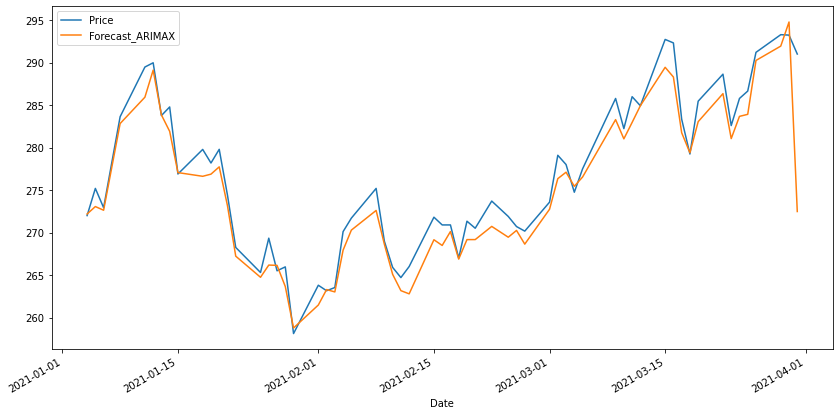

In [ ]:
#plot results
df_valid[["Price", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

Creating labels for the dataset based on bollinger bands crosspoints.

In [ ]:
actions = []
for i in range(len(current_df['Price'])):
  if current_df['Price'][i] < current_df['lower_bb'][i]:
    actions.append(1)
  elif current_df['Price'][i] > current_df['upper_bb'][i]:
    actions.append(0)   
  else:
    actions.append(2)
    

In [ ]:
current_df['actions'] = actions

In [ ]:
current_df.actions.value_counts()

2    201
1     13
0      7
Name: actions, dtype: int64

I have 201 crosspoints for HOLD so most of the time is better to hold.


I have 13 points for SELL.


I have 7 points for BUY.

In [ ]:
#validation set of Arimax
closingpricesarimax =  df_valid['Price'] # Use only closing prices

In [ ]:
#validation set if Arimax
smaarimax = get_sma(closingpricesarimax, 20) # Get 20 day SMA

In [ ]:
#bollinger bands of Arimax
bollinger_uparimax, bollinger_downarimax = get_bollinger_bands(closingpricesarimax, smaarimax)

In [ ]:
df_valid['sma_20'] = get_sma(df_valid['Price'], 20)
df_valid.tail()

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,day_of_week,sma_20
56,2021-01-11,289.49,282.86,292.95,279.48,112.35,0.0206,1,2,11,0,273.0940
57,2021-01-08,283.64,275.11,283.99,275.11,88.93,0.0392,1,1,8,4,273.6910
58,2021-01-06,272.93,275.94,275.94,271.62,40.95,-0.0082,1,1,6,2,273.8320
59,2021-01-05,275.20,272.69,275.70,270.28,45.58,0.0118,1,1,5,1,274.4155
60,2021-01-04,272.00,274.67,276.60,270.61,48.92,0.0013,1,1,4,0,274.8580


In [ ]:
df_valid['upper_bb'], df_valid['lower_bb'] = get_bollinger_bands(df_valid['Price'], df_valid['sma_20'], 20)
df_valid.tail()

,Date,Price,Open,High,Low,Vol.,Change %,month,week,day,day_of_week,sma_20,upper_bb,lower_bb
56,2021-01-11,289.49,282.86,292.95,279.48,112.35,0.0206,1,2,11,0,273.0940,291.766938,254.421062
57,2021-01-08,283.64,275.11,283.99,275.11,88.93,0.0392,1,1,8,4,273.6910,292.931145,254.450855
58,2021-01-06,272.93,275.94,275.94,271.62,40.95,-0.0082,1,1,6,2,273.8320,293.002856,254.661144
59,2021-01-05,275.20,272.69,275.70,270.28,45.58,0.0118,1,1,5,1,274.4155,292.966476,255.864524
60,2021-01-04,272.00,274.67,276.60,270.61,48.92,0.0013,1,1,4,0,274.8580,292.685630,257.030370


In [ ]:
#by and sell of Arimax validation set
buyersdf = df_valid[df_valid['Price'] <= df_valid['lower_bb']]
sellersdf = df_valid[df_valid['Price'] >= df_valid['upper_bb']]

In [ ]:
# Plotting

import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = "plotly_dark"

fig = go.Figure()
fig.add_trace(go.Scatter(x=bollinger_downarimax.index, 
                         y=df_valid['lower_bb'], 
                         name='Lower Band', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=bollinger_uparimax.index, 
                         y=df_valid['upper_bb'], 
                         name='Upper Band', 
                         fill='tonexty', 
                         fillcolor='rgba(173,204,255,0.2)', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=df_valid.index, 
                         y=df_valid['Price'], 
                         name='Price', 
                         line_color='#636EFA'
                        ))

fig.add_trace(go.Scatter(x=buyersdf.index, 
                         y=buyersdf['Price'], 
                         name='Buyers', 
                         mode='markers',
                         marker=dict(
                             color='#00CC96',
                             size=10,
                             )
                         ))
fig.add_trace(go.Scatter(x=sellersdf.index, 
                         y=sellersdf['Price'], 
                         name='Sellers', 
                         mode='markers', 
                         marker=dict(
                             color='#EF553B',
                             size=10,
                             )
                         ))
fig.show()

In [ ]:
#accuracy
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Price, df_valid.Forecast_ARIMAX)))
print("nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Price, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 3.038938161282392
nMAE of Auto ARIMAX: 1.8768496185233394


Sell, Buy or Hold Classifier Machine Leaning Model training based on the created labels.

In [ ]:
modeldf = current_df.drop(['actions','lower_bb','upper_bb','sma_20'], axis =1)

In [ ]:

# transform the dataset
scaler = StandardScaler()
current_df_norm = scaler.fit_transform(modeldf)
Xaxis = np.array(current_df_norm)
Yxis = np.array(current_df['actions'])
#balance the labels

oversample = SMOTE()
Xaxis, Yxis = oversample.fit_resample(Xaxis, Yxis)


In [ ]:
#count labels
counter = Counter(Yxis)
print(counter)

Counter({2: 201, 1: 201, 0: 201})


In [ ]:
#make a model and train
rf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(rf, Xaxis, Yxis)
print(scores.mean())

classifier = rf.fit(Xaxis,Yxis)
predictions = classifier.predict_proba(Xaxis)
print(predictions)

0.8076584022038569
[[0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 ...
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.2 0.8 0. ]]


Tuning

In [ ]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
#randomized tuning
clftuned = RandomizedSearchCV(rf, random_grid, random_state=0)
search = clftuned.fit(Xaxis,Yxis)
search.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 180}

In [ ]:
predictionsCV = search.predict_proba(Xaxis)[:,1]
print(predictionsCV)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



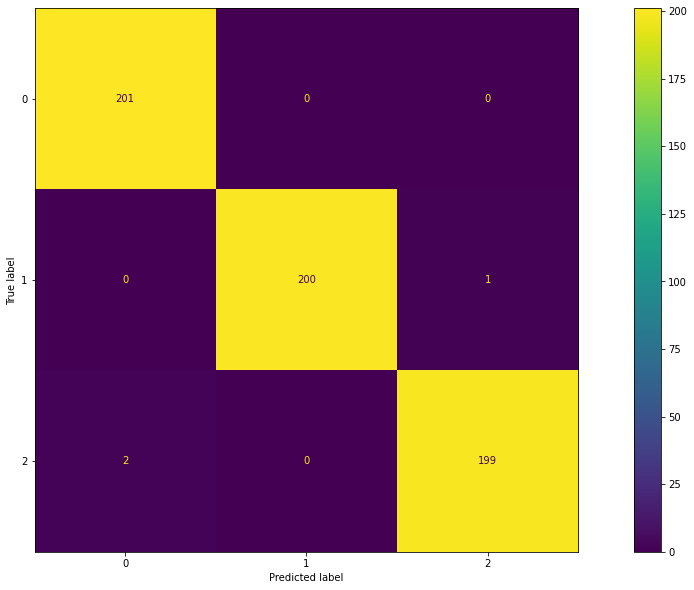

In [ ]:
#confusion matrix after tuning 
plot_confusion_matrix(search, Xaxis, Yxis)  
plt.show() 

So the model trained well and classified all labels correctly only 1 label wrong in 1 and two wrong labels in 2.

Classification report

In [ ]:
grid_predictions = search.predict(Xaxis)
 
# print classification report
print(classification_report(Yxis, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       201
           1       1.00      1.00      1.00       201
           2       0.99      0.99      0.99       201

    accuracy                           1.00       603
   macro avg       1.00      1.00      1.00       603
weighted avg       1.00      1.00      1.00       603



ROC Curve

In [ ]:

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Yxis, predictionsCV[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Yxis))]
p_fpr, p_tpr, _ = roc_curve(Yxis, random_probs, pos_label=1)

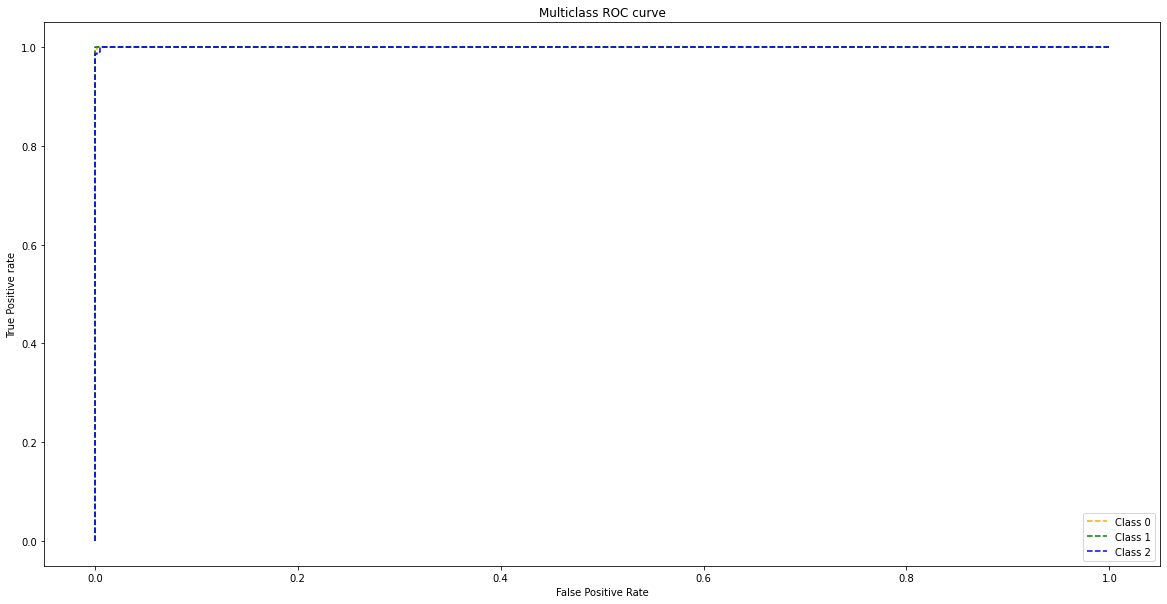

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Yxis, predictionsCV[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1' )
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2' )
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
  

Calibration of predicted probabilities.

In [ ]:

calibrated_clf = CalibratedClassifierCV(
    base_estimator=search,method="sigmoid",
    cv="prefit"
)
calibrated_clf.fit(Xaxis, Yxis)

len(calibrated_clf.calibrated_classifiers_)

calibrated_clf.predict_proba(Xaxis)

array([[0.00247519, 0.00247519, 0.99504961],
       [0.00247519, 0.00247519, 0.99504961],
       [0.00247519, 0.00247519, 0.99504961],
       ...,
       [0.00247519, 0.99504961, 0.00247519],
       [0.00247519, 0.99504961, 0.00247519],
       [0.00247519, 0.99504961, 0.00247519]])

In [ ]:
calibpreds = calibrated_clf.predict_proba(Xaxis)

Testing the calibrated probabilities on a plot.

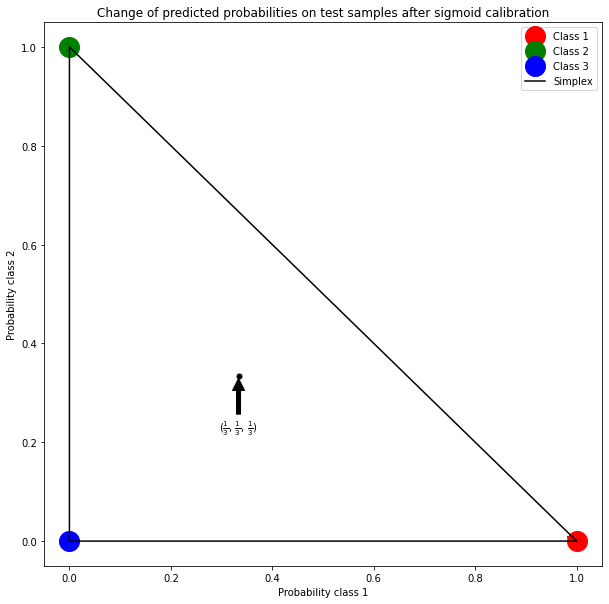

In [ ]:


plt.figure(figsize=(10, 10))
colors = ["r", "g", "b"]

clf_probs = search.predict_proba(Xaxis)
cal_clf_probs = calibrated_clf.predict_proba(Xaxis)
# Plot arrows
for i in range(clf_probs.shape[0]):
    plt.arrow(
        clf_probs[i, 0],
        clf_probs[i, 1],
        cal_clf_probs[i, 0] - clf_probs[i, 0],
        cal_clf_probs[i, 1] - clf_probs[i, 1],
        color=colors[Yxis[i]],
        head_width=1e-2,
    )

# Plot perfect predictions, at each vertex
plt.plot([1.0], [0.0], "ro", ms=20, label="Class 1")
plt.plot([0.0], [1.0], "go", ms=20, label="Class 2")
plt.plot([0.0], [0.0], "bo", ms=20, label="Class 3")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], "k", label="Simplex")

# Annotate points 6 points around the simplex, and mid point inside simplex
plt.annotate(
    r"($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)",
    xy=(1.0 / 3, 1.0 / 3),
    xytext=(1.0 / 3, 0.23),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.plot([1.0 / 3], [1.0 / 3], "ko", ms=5)


plt.title("Change of predicted probabilities on test samples after sigmoid calibration")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
_ = plt.legend(loc="best")

# Tpot Looks for the best combination of models and tunings.

In [ ]:
scores = []
winning_pipes = []
tpot = TPOTClassifier(verbosity=3, 
                      scoring="balanced_accuracy", 
                      random_state=23, 
                      periodic_checkpoint_folder="tpot_mnst1.txt", 
                      n_jobs=-1, 
                      generations=10, 
                      population_size=100)
# run three iterations and time them
for x in range(3):
    
    tpot.fit(Xaxis, Yxis)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(Xaxis, Yxis))
print('Scores:', scores)  
print('Winning pipelines:', winning_pipes)


32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mu

Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mu

Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mu

The winning pipeline in the result. So TPot found the most optimized combination of machine learning algorithms and tunings among all that existed and compiled and fitted only for the current data I have to analyze. This is very strong because optimizing only one machine learning model is limited and never will bring better.

Bayesian Optimization finds the best optimized parameters for a given model.

In [ ]:

opt = BayesSearchCV(
    RandomForestClassifier(),
    {
      'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230],
    },
    n_iter=32,
    cv=3
)

opt.fit(Xaxis,Yxis)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(Xaxis,Yxis))

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


val. score: 0.8308457711442786
test score: 1.0



Hyper optimization is another good technique that finds the best optimized parameters for a given model.


In [ ]:

# define search
modelopt = HyperoptEstimator()


# perform the search
modelopt.fit(Xaxis,Yxis)

# summarize performance
acc = modelopt.score(Xaxis,Yxis)
print("Accuracy: %.3f" % acc)
# summarize the best model
print(modelopt.best_model())

100%|██████████| 1/1 [00:02<00:00,  2.84s/it, best loss: 0.14876033057851235]
Accuracy: 0.998
{'learner': SVC(C=7123.409893696275, cache_size=512, coef0=1.9740752344168728, degree=3.0,
    gamma=0.9505238276016633, kernel='poly', max_iter=210121935.0,
    random_state=1, shrinking=False, tol=8.960810002827249e-05), 'preprocs': (StandardScaler(),), 'ex_preprocs': ()}


# Conclusion

I can forecast prices. I can tell when to buy , to sell, to hold. To maximize Capital Returns, I would look at predictions and buy and sell points. It is possible to forecast more returns if to follow the strategy of bollinger bands in the future where the deal would be the maximum. This would be the calculated difference and choosing the best time to buy and sell. If you look at the plot, you can see that I have 13 buy and sell points and the data point number 8,9,10,12,13 would give best returns from a deal. The more accurate machine learning model for predictions the less loss will happen.Loss will never happen if to follow the predictions because it can show negative numbers so the predictions will warn and thus the loss will never happen. Hold period will be minimized if to make each deal with the positive returns. For what technology to use I would use Arimax and LSTM for predictions as it predicts more realistic and accurate future prices and to use the forecasted data for bollinger bands. Also, I try to apply this step by step strategy in all-in-one model: TimeSeries Classification. It is handful. In general, the problem solution is found and needs more time for optimizations and testing. 